# Student Performance Indicator

### Life Cycle of a ML Project

- Understanding Problem Statement
- Data Collection
- Data Checks
- EDA
- Data Pre-Processing/Feature Engineering
- Model Training
- Best Model
- Model Evaluation
- Model Deployment

### Problem Statement

- Understand how the student performance(test score) is impacted by other variables such as Genter, Ethinicity, Parental Level of Education, Lunch and Test Prepration score.

### Data Collection

- Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset as pandas dataframe
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's - - degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
# Check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# check duplicates
df.duplicated().sum()

0

In [6]:
#check data type of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check number of unique vlaues at each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
#get discriptive stats
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df['gender'].value_counts()


gender
female    518
male      482
Name: count, dtype: int64

In [10]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [11]:
df['race_ethnicity'].unique()
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [12]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [13]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [14]:
print("Categories in 'gender' variable: {}".format(df['gender'].unique()))

print("Categories in 'race ethnicity' variable: {}".format(df['race_ethnicity'].unique()))

print("Categories in 'parental level of education' variable: {}".format(df['parental_level_of_education'].unique()))

print("Categories in 'lunch' variable: {}".format(df['lunch'].unique()))

print("Categories in 'test preparation course' variable: {}".format(df['test_preparation_course'].unique()))

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [15]:
# Creating features for total and sverage score

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Data Exploraton with Visualisation

<Axes: xlabel='total_score', ylabel='Count'>

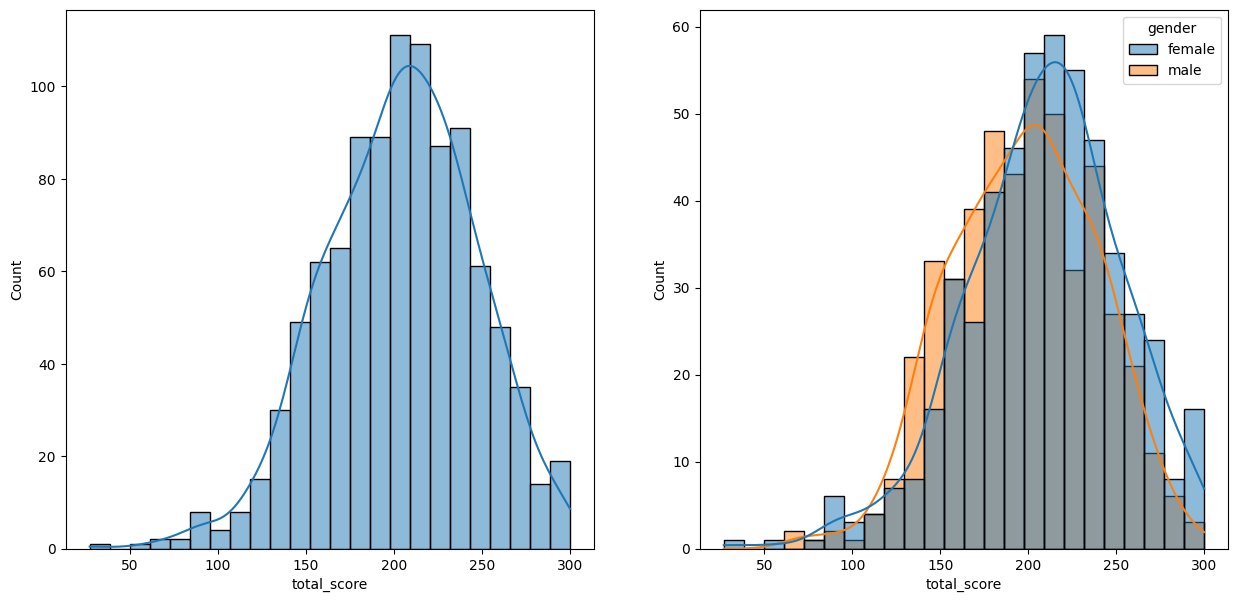

In [16]:
# Total Score distribution without and with gender distribustion

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(df['total_score'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')



<Axes: xlabel='average', ylabel='Count'>

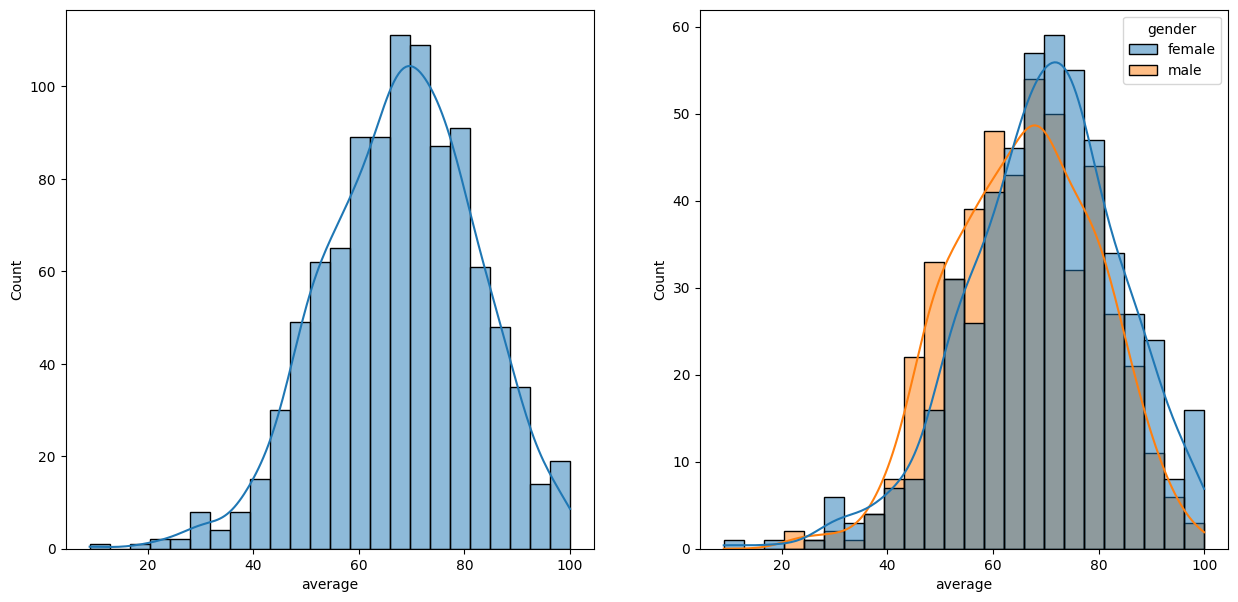

In [17]:
# average Score distribution without and with gender distribustion

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(df['average'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df, x='average', kde=True, hue='gender')

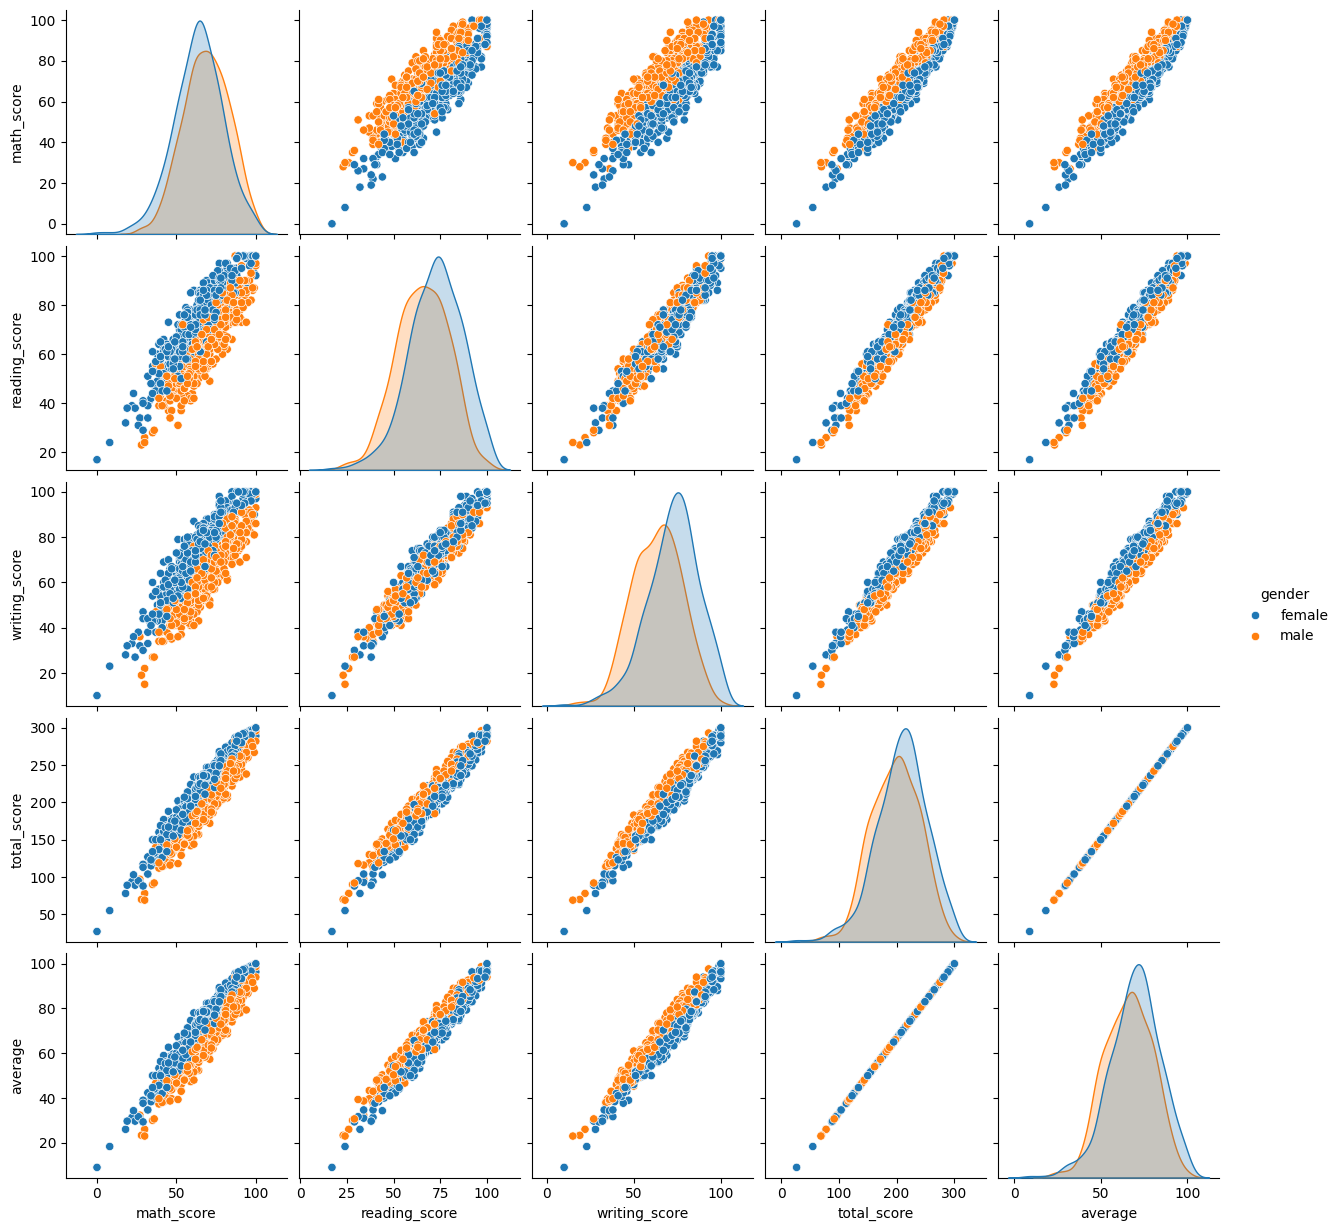

In [18]:
#Multivariate anayaia using pairplot
sns.pairplot(df,hue = 'gender')
plt.show()

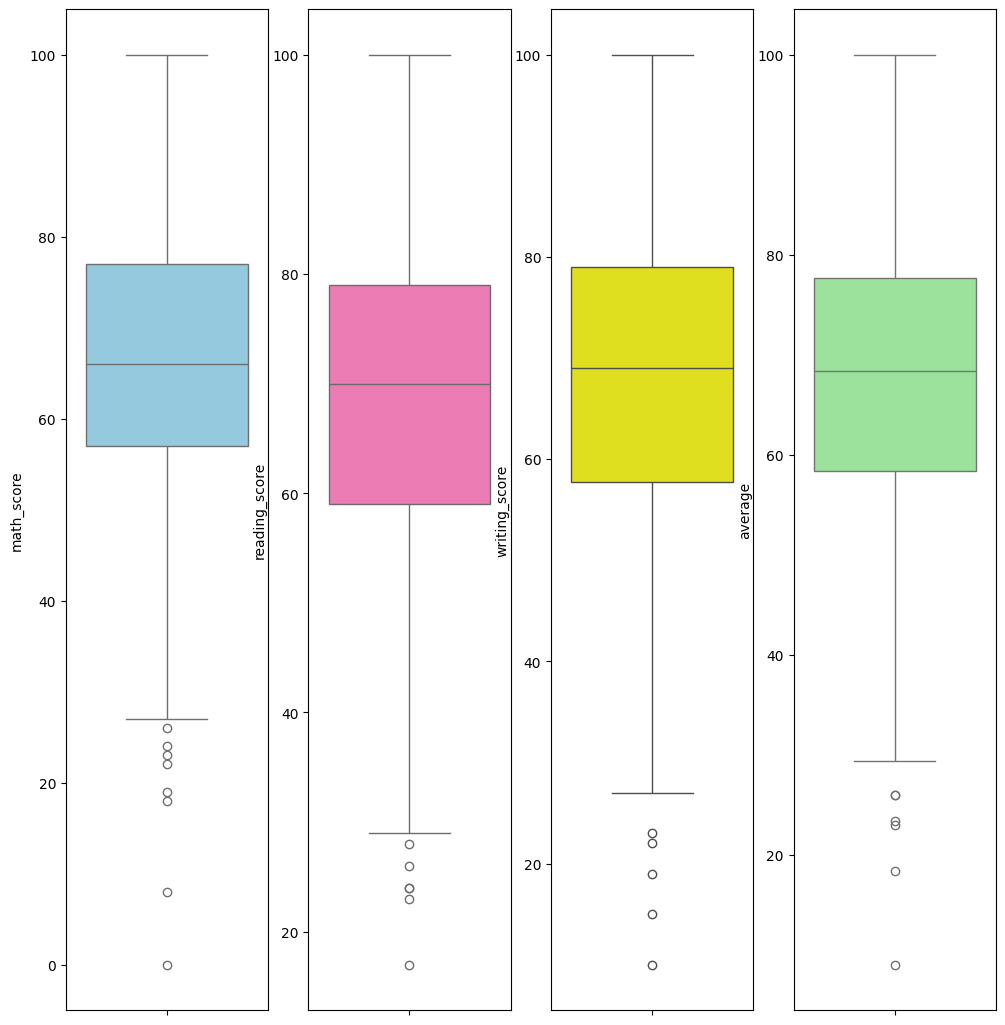

In [28]:
#Check outliers
plt.subplots(figsize=(12,13))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.